In [1]:
#1	Load the dataset
#2	Describe the attributes (Data type, range)  of the dataset
#3	Clean the dataset
#4	Test the assumptions for Linear Regression
#5	OLS method to fit linear model

In [ ]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm

# About the Data


    CRIM: Per capita crime rate by town
    ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS: Proportion of non-retail business acres per town.
    CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX: Nitric oxides concentration (parts per 10 million)
    RM: Average number of rooms per dwelling
    AGE: Proportion of owner-occupied units built prior to 1940
    DIS: Weighted distances to five Boston employment centers
    RAD: Index of accessibility to radial highways
    TAX: Full-value property-tax rate per 10,000 dollar
    PTRATIO: Pupil-teacher ratio by town
    B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
    Note: I really don’t like this variable because I think it’s both highly unethical to determine house prices by the color of people’s skin in a given area in a predictive modeling scenario and it irks me that it singles out one ethnicity rather than including all others. I am leaving it in for this notebook to keep the code simple, but I would remove it in a real-world situation.
    LSTAT: % lower status of the population
    MEDV: Median value of owner-occupied homes in $1,000’s


In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(r'F:\housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [3]:
boston =data

In [4]:
display(boston)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [5]:
#Checking Missing values
data = pd.DataFrame(boston.dtypes)
data['MissingVal'] = boston.isnull().sum()
print(data)

               0  MissingVal
CRIM     float64           0
ZN       float64           0
INDUS    float64           0
CHAS       int64           0
NOX      float64           0
RM       float64           0
AGE      float64           0
DIS      float64           0
RAD        int64           0
TAX      float64           0
PTRATIO  float64           0
B        float64           0
LSTAT    float64           0
MEDV     float64           0


In [6]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [12]:
#lm = smf.ols(formula = 'MEDV~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT',data = boston).fit()
#lm = smf.ols(formula = 'MEDV~ CRIM + ZN + INDUS + CHAS + NOX + RM  + DIS + RAD + TAX + PTRATIO + B + LSTAT',data = z).fit()
lm = smf.ols(formula = 'MEDV~ CRIM + ZN + CHAS + NOX + RM +  DIS + RAD + TAX + PTRATIO + B + LSTAT',data = z).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Thu, 14 Nov 2019   Prob (F-statistic):          5.54e-137
Time:                        18:23:14   Log-Likelihood:                 427.31
No. Observations:                 506   AIC:                            -830.6
Df Residuals:                     494   BIC:                            -779.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.863e-16      0.005  -1.25e-13      1.000      -0.009       0.009
CRIM          -0.2143      0.065     -3.307      0.001      -0.342      -0.087
ZN             0.1019      0.030      3.390      0.001       0.043       0.161
CHAS           0.0604      0.019      3.183      0.002       0.023       0.098
NOX           -0.1877      0.038     -4.915      0.000      -0.263      -0.113
RM             0.4409      0.047      9.356      0.000       0.348       0.533
DIS           -0.3648      0.045     -8.037      0.000      -0.454      -0.276
RAD            0.1531      0.032      4.726      0.000       0.089       0.217
TAX           -0.1371      0.039     -3.493      0.001      -0.214      -0.060
PTRATIO       -0.1977      0.027     -7.334      0.000      -0.251      -0.145
B              0.0819      0.024      3.475      0.001       0.036       0.128
LSTAT         -0.4208      0.038    -11.019      0.000      -0.496      -0.346
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                         14.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
#Normalizing the dataset
z = (boston - boston.mean())/(boston.max() - boston.min())

In [10]:
z.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-2.989484e-18,1.148072e-16,-6.812595e-16,-1.189760e-16,6.223338e-16,-1.521044e-15,-3.491388e-16,1.206490e-16,6.406821e-17,1.933017e-16,-2.300312e-15,1.881620e-15,-1.082797e-16,-5.471030e-16
std,9.667929e-02,2.332245e-01,2.514792e-01,2.539940e-01,2.384314e-01,1.346268e-01,2.898956e-01,1.914822e-01,3.785765e-01,3.216357e-01,2.303134e-01,2.302054e-01,1.970492e-01,2.043801e-01
min,-4.054410e-02,-1.136364e-01,-3.913775e-01,-6.916996e-02,-3.491668e-01,-5.218690e-01,-6.763636e-01,-2.423813e-01,-3.717134e-01,-4.222083e-01,-6.229291e-01,-8.985678e-01,-3.014090e-01,-3.896179e-01
25%,-3.969297e-02,-1.136364e-01,-2.179904e-01,-6.916996e-02,-2.174795e-01,-7.647718e-02,-2.425325e-01,-1.541223e-01,-2.412786e-01,-2.466358e-01,-1.122908e-01,4.716191e-02,-1.573693e-01,-1.223957e-01
50%,-3.773202e-02,-1.136364e-01,-5.303441e-02,-6.916996e-02,-3.435197e-02,-1.458793e-02,9.191657e-02,-5.343258e-02,-1.978003e-01,-1.493075e-01,6.324111e-02,8.766445e-02,-3.568055e-02,-2.961792e-02
75%,7.143872e-04,1.136364e-02,2.552500e-01,-6.916996e-02,1.426028e-01,6.492922e-02,2.626169e-01,1.267068e-01,6.282866e-01,4.919138e-01,1.855815e-01,9.973011e-02,1.187069e-01,5.482653e-02
max,9.594559e-01,8.863636e-01,6.086225e-01,9.308300e-01,6.508332e-01,4.781310e-01,3.236364e-01,7.576187e-01,6.282866e-01,5.777917e-01,3.770709e-01,1.014322e-01,6.985910e-01,6.103821e-01


In [11]:
z.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.040544,0.066364,-0.323562,-0.06917,-0.034352,0.055636,-0.034757,0.026822,-0.371713,-0.214193,-0.335695,0.101432,-0.211729,0.032604
1,-0.040308,-0.113636,-0.149075,-0.06917,-0.176327,0.026129,0.106335,0.106581,-0.328235,-0.317246,-0.069738,0.101432,-0.096939,-0.020729
2,-0.040308,-0.113636,-0.149075,-0.06917,-0.176327,0.172517,-0.076981,0.106581,-0.328235,-0.317246,-0.069738,0.091169,-0.237943,0.270382
3,-0.040251,-0.113636,-0.328328,-0.06917,-0.198961,0.136686,-0.234551,0.206163,-0.284757,-0.355414,0.026007,0.095708,-0.268021,0.241493
4,-0.039839,-0.113636,-0.328328,-0.06917,-0.198961,0.165236,-0.148042,0.206163,-0.284757,-0.355414,0.026007,0.101432,-0.202071,0.303715


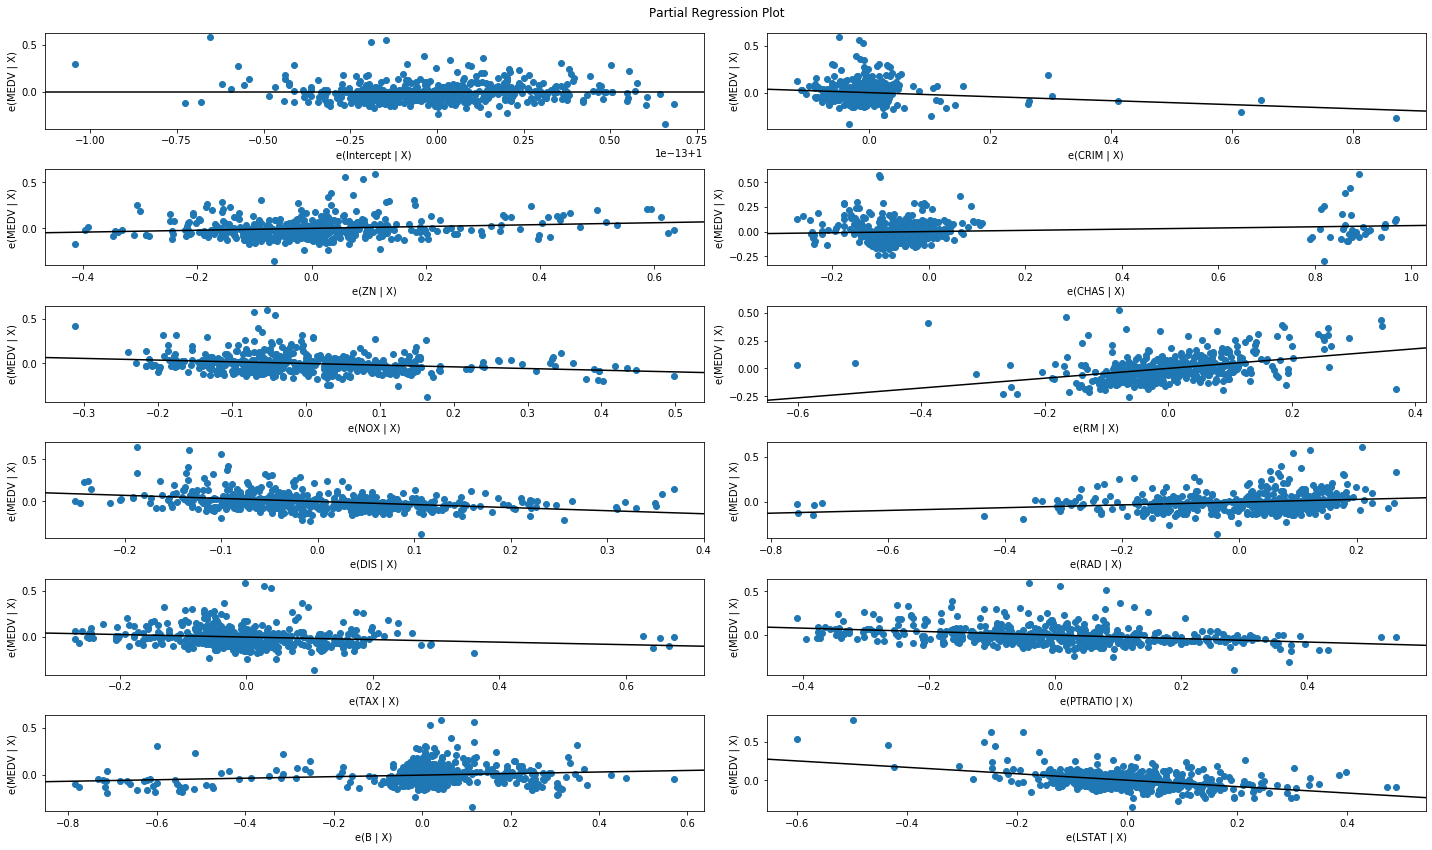

In [13]:
fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(lm, fig=fig)

In [14]:
#lm = smf.ols(formula = 'MEDV~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT',data = z).fit()
#lm = smf.ols(formula = 'MEDV~ CRIM + ZN + INDUS + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT',data = z).fit()
lm = smf.ols(formula = 'MEDV~ CRIM + ZN + CHAS + NOX + RM  + DIS + RAD + TAX + PTRATIO + B + LSTAT',data = z).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Thu, 14 Nov 2019   Prob (F-statistic):          5.54e-137
Time:                        18:23:34   Log-Likelihood:                 427.31
No. Observations:                 506   AIC:                            -830.6
Df Residuals:                     494   BIC:                            -779.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.863e-16      0.005  -1.25e-13      1.000      -0.009       0.009
CRIM          -0.2143      0.065     -3.307      0.001      -0.342      -0.087
ZN             0.1019      0.030      3.390      0.001       0.043       0.161
CHAS           0.0604      0.019      3.183      0.002       0.023       0.098
NOX           -0.1877      0.038     -4.915      0.000      -0.263      -0.113
RM             0.4409      0.047      9.356      0.000       0.348       0.533
DIS           -0.3648      0.045     -8.037      0.000      -0.454      -0.276
RAD            0.1531      0.032      4.726      0.000       0.089       0.217
TAX           -0.1371      0.039     -3.493      0.001      -0.214      -0.060
PTRATIO       -0.1977      0.027     -7.334      0.000      -0.251      -0.145
B              0.0819      0.024      3.475      0.001       0.036       0.128
LSTAT         -0.4208      0.038    -11.019      0.000      -0.496      -0.346
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                         14.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
x = z['DIS']
y = z['NOX']

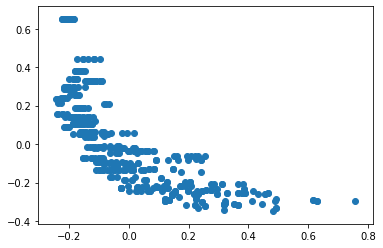

In [23]:
plt.scatter(x,y)